# Training a food siamese model

imports

In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT= "Project Data/Food"

### Creating triplets for a training or validation

In [ ]:
def create_triplets(directory, folders):
    triplets = []
    
    #loop over each food folder. the folder name is the class label
    for folder in folders:
        path = os.path.join(directory, folder)
        files = list(os.listdir(path)) # get all the images in the folder
        num_files = len(files)
        
        
        for i in range(num_files-1): #anchors
            for j in range(i+1, num_files): #positives
                anchor = (folder, files[i])
                positive = (folder, files[j])

                neg_folder = folder
                while neg_folder == folder: #get random negative
                    neg_folder = random.choice(folders)
                neg_files = os.listdir(os.path.join(directory, neg_folder))
                neg_file = random.choice(neg_files)
                negative = (neg_folder, neg_file)

                triplets.append((anchor, positive, negative))
            
    random.shuffle(triplets)
    return triplets

### Get the list of food folders

In [4]:
trainList=os.listdir("Project Data/Food/Train/")
validationList=os.listdir("Project Data/Food/Validation/")

### Create Triplets for each set

In [19]:
trainTriplets=create_triplets("Project Data/Food/Train",trainList)
validationTriplets=create_triplets("Project Data/Food/Validation",validationList)

In [6]:
print("Number of training triplets :", len(trainTriplets))
print("Number of validation triplets :", len(validationTriplets))

print("\nExamples of triplets:")
for i in range(5):
    print(validationTriplets[i])

Number of training triplets : 42611
Number of validation triplets : 4692

Examples of triplets:
(('bruschetta', '1231530.jpg'), ('bruschetta', '3477321.jpg'), ('spring_rolls', '329915.jpg'))
(('bruschetta', '1029070.jpg'), ('bruschetta', '3477321.jpg'), ('ceviche', '390121.jpg'))
(('spring_rolls', '2559517.jpg'), ('spring_rolls', '3146504.jpg'), ('bruschetta', '3472240.jpg'))
(('dumplings', '2994639.jpg'), ('dumplings', '3152671.jpg'), ('spring_rolls', '3068228.jpg'))
(('creme_brulee', '2152670.jpg'), ('creme_brulee', '798636.jpg'), ('dumplings', '1343111.jpg'))


In [7]:
def read_and_process_image(split,index,size=(224,224)):
    path = os.path.join(ROOT,split, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    return image

### Batch generator for training loop

In [ ]:
def get_batch(split,triplet_list, batch_size=256):
    batch_steps = len(triplet_list)//batch_size
    
    for i in range(batch_steps+1):
        anchor   = []
        positive = []
        negative = []
        
        j = i*batch_size
        while j<(i+1)*batch_size and j<len(triplet_list):
            a, p, n = triplet_list[j]
            anchor.append(read_and_process_image(split,a))
            positive.append(read_and_process_image(split,p))
            negative.append(read_and_process_image(split,n))
            j+=1
            
        anchor = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)

        yield ([anchor, positive, negative])

### Plot a part of the first training batch

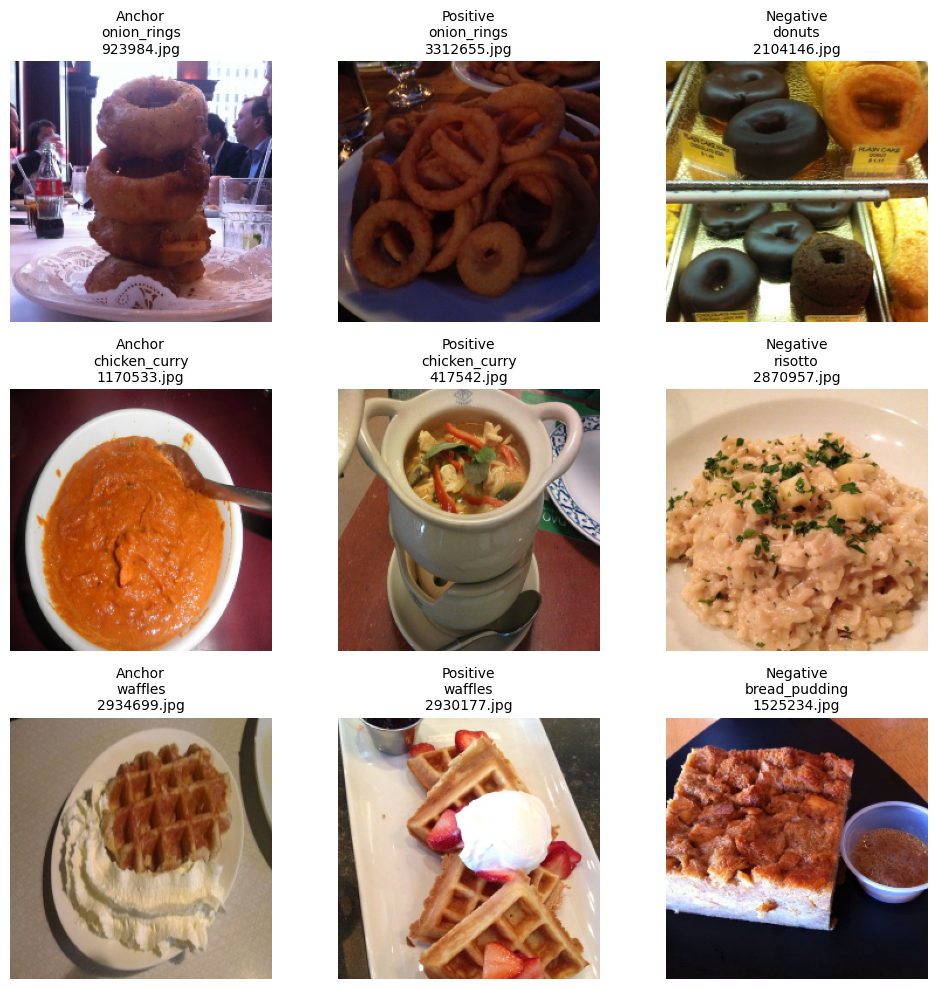

In [ ]:
num_plots = 3
f, axes = plt.subplots(num_plots, 3, figsize=(10, 10))

#get the first batch
for x in get_batch("Train", trainTriplets, batch_size=num_plots):
    a_imgs, p_imgs, n_imgs = x
    
    for i in range(num_plots):
        anchor_meta, positive_meta, negative_meta = trainTriplets[i]

        # 2. Plot Anchor (Column 0)
        axes[i, 0].imshow(a_imgs[i])
        axes[i, 0].set_title(f"Anchor\n{anchor_meta[0]}\n{anchor_meta[1]}", fontsize=10)
        axes[i, 0].axis('off')

        # 3. Plot Positive (Column 1)
        axes[i, 1].imshow(p_imgs[i])
        axes[i, 1].set_title(f"Positive\n{positive_meta[0]}\n{positive_meta[1]}", fontsize=10)
        axes[i, 1].axis('off')

        # 4. Plot Negative (Column 2)
        axes[i, 2].imshow(n_imgs[i])
        axes[i, 2].set_title(f"Negative\n{negative_meta[0]}\n{negative_meta[1]}", fontsize=10)
        axes[i, 2].axis('off')
        
    plt.tight_layout() 
    break